# Data analysis & pre-processing
The given data has the following histograms:

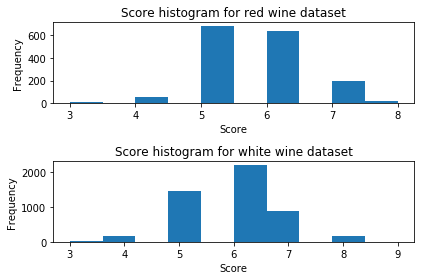

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datdir = "datasets"
red_dat = pd.read_csv( "./" + datdir + "/winequality-red.csv",';')
white_dat = pd.read_csv( "./" + datdir + "/winequality-white.csv", ';')

ts_r = red_dat['quality']
ts_w = white_dat['quality']

plt.subplot(211)
ts_r.plot.hist()
plt.xlabel("Score")
plt.title("Score histogram for red wine dataset")

plt.subplot(212)
ts_w.plot.hist()
plt.xlabel("Score")
plt.title("Score histogram for white wine dataset")

plt.tight_layout()
plt.show()

Looking at the figure above, it can be seen that both datasets follow the normal distribution quite closely. Also, scores 1~2 are not present in either of the datasets, while score 9 is not present from the white wine dataset only. This gives motivation to combine the datasets together for both red and white wine, and generalize for the quality of both red and white wines.

The ```get_data()``` function in ```data_utils.py``` concatenates these two datasets, yielding us a final dataset:


In [2]:
from src.utils.data_utils import get_data


concat_data = get_data(datdir)
concat_data.head(10) #diplaying first 10 examples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


The new hisogram for the combined dataset is better, covering a wider range of qualities in more quantities.

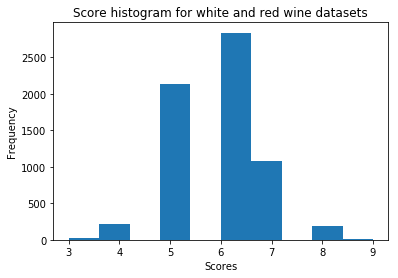

In [3]:
plt.figure()
concat_data['quality'].plot.hist()
plt.xlabel("Scores")
plt.title("Score histogram for white and red wine datasets")
plt.show()

Scores 1,2 are still not present in the dataset. This makes it difficult to learn the correct answers for future wine datasets that the machine will predict on for these scores, as there is no examples on these scores. This gives motivation to bag the dataset into 5 categories: ```{ 'worst':1, 'worse':2, 'better':3, 'best':4 }```. The median score, 6 will be the new centered average score 3, and 7 will be better and anything greater will be considered best, and similiarly for the lower scores. This can be both thought of as a classification problem ("Is this wine the best or worst?") or a regression problem ("Rate this wine out of 3 stars"). 

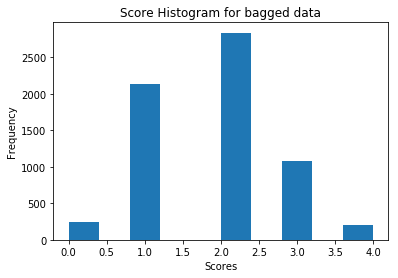

In [4]:
recode = {3:0, 4:0, 5:1, 6:2, 7:3, 8:4,9:4}
#recode = {3:0,4:0,5:0,6:0,7:1,8:1,9:1}
concat_data['quality_c'] = concat_data['quality'].map(recode)

plt.figure()
concat_data['quality_c'].plot.hist()
plt.xlabel("Scores")
plt.title("Score Histogram for bagged data")
plt.show()

The ```classify.py``` module uses the One vs Rest classifier to classify the different scores, treating the problem as a multiclass classification problem. It uses two different estimators, linear regression and support vector classification with rbg kernals. Various metrics are printed below. Note that the .score method from sklearn for ```OneVsRestClassifier``` "Returns the mean accuracy on the given test data and labels.In multi-label classification, 
this is the subset accuracy which is a harsh metric since you require for each sample that each 
label set be correctly predicted."

Linear Regression:

Confusion Matrix(Testing Sample):

Confusion matrix, without normalization
[[  0  26  15   0   0]
 [  0 278 149   2   0]
 [  0 144 426   2   0]
 [  0  17 194   3   0]
 [  0   3  39   2   0]]
Normalized confusion matrix
[[ 0.    0.63  0.37  0.    0.  ]
 [ 0.    0.65  0.35  0.    0.  ]
 [ 0.    0.25  0.74  0.    0.  ]
 [ 0.    0.08  0.91  0.01  0.  ]
 [ 0.    0.07  0.89  0.05  0.  ]]


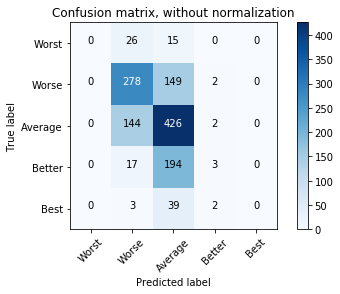

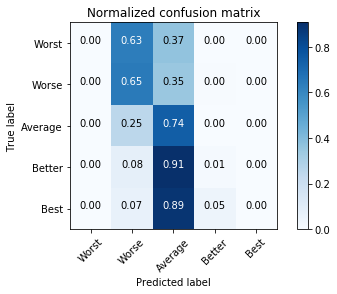


Confusion Matrix(Test Sample):

 [[  0  26  15   0   0]
 [  0 278 149   2   0]
 [  0 144 426   2   0]
 [  0  17 194   3   0]
 [  0   3  39   2   0]]
Mean squared error for test data: 0.643076923077
Test set score(sklearn): 0.543846153846
Classification Report(Training set):
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        41
          1       0.59      0.65      0.62       429
          2       0.52      0.74      0.61       572
          3       0.33      0.01      0.03       214
          4       0.00      0.00      0.00        44

avg / total       0.48      0.54      0.48      1300



C:\Users\annoc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC :

Confusion Matrix(Testing Sample):

Confusion matrix, without normalization
[[  1  21  15   4   0]
 [  1 277 139  12   0]
 [  4 125 403  40   0]
 [  0  28  98  88   0]
 [  0   1  13  12  18]]
Normalized confusion matrix
[[ 0.02  0.51  0.37  0.1   0.  ]
 [ 0.    0.65  0.32  0.03  0.  ]
 [ 0.01  0.22  0.7   0.07  0.  ]
 [ 0.    0.13  0.46  0.41  0.  ]
 [ 0.    0.02  0.3   0.27  0.41]]


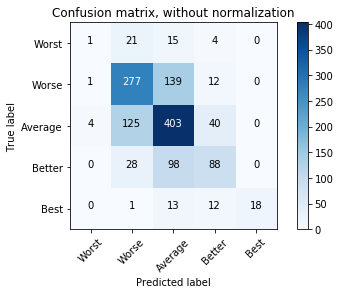

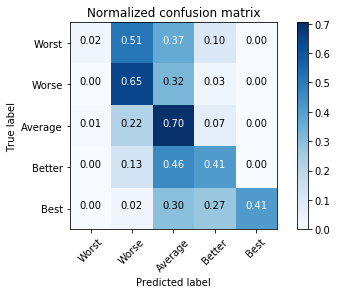


Confusion Matrix(Test Sample):

 [[  1  21  15   4   0]
 [  1 277 139  12   0]
 [  4 125 403  40   0]
 [  0  28  98  88   0]
 [  0   1  13  12  18]]
Mean squared error for test data: 0.591538461538
Test set score(sklearn): 0.605384615385
Classification Report(Training set):
              precision    recall  f1-score   support

          0       0.17      0.02      0.04        41
          1       0.61      0.65      0.63       429
          2       0.60      0.70      0.65       572
          3       0.56      0.41      0.48       214
          4       1.00      0.41      0.58        44

avg / total       0.60      0.61      0.59      1300



In [5]:
from src.classify import classify

classify(datdir,False)